<a href="https://colab.research.google.com/github/MarvDaParndAndy/MAT-421-Material/blob/main/MAT_421_HW_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAT 421 HW set 3: Sections 17.4 & 17.5

Jacob Camacho

# Section 17.4: Lagrange Polynomial Interpolation

*   Lagrange Polynomial Interpolation: Finds a single polynomial that goes throgh all the data points. Meaning it must have the property that L(x_i)=y_i
*   When computing Lagrange polynomials, it is useful to write them as a linear combination of Lagrange polynomials P_i(x)= ((Π)^n,_j=1, j=\=i((x-x_j)/(x_i-x_j)))
*   Also we have that: L(x) = Σ^n_i=1(y_iP_i(x))
*   By construction, P_i(x) has the property that P_I(x_j)=1 when i=j and P_i(x_j)=0 when i=/=j
*   Because L(x) is a sum of these polynomials, L(x_i) = y_i






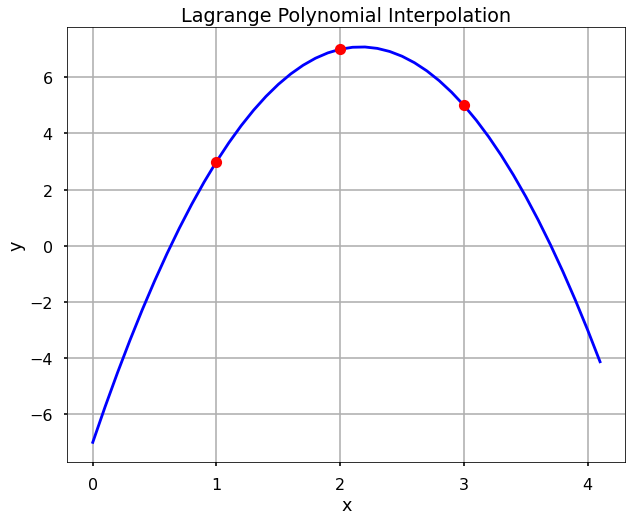

In [14]:
#Example using the lagrange function
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange

x = [1, 2, 3]
y = [3, 7, 5]

x_new = np.arange(0, 4.2, .1)

f = lagrange(x, y)

fig = plt.figure(figsize = (10,8))
plt.plot(x_new, f(x_new), 'b', x, y, 'ro')
plt.title('Lagrange Polynomial Interpolation')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()


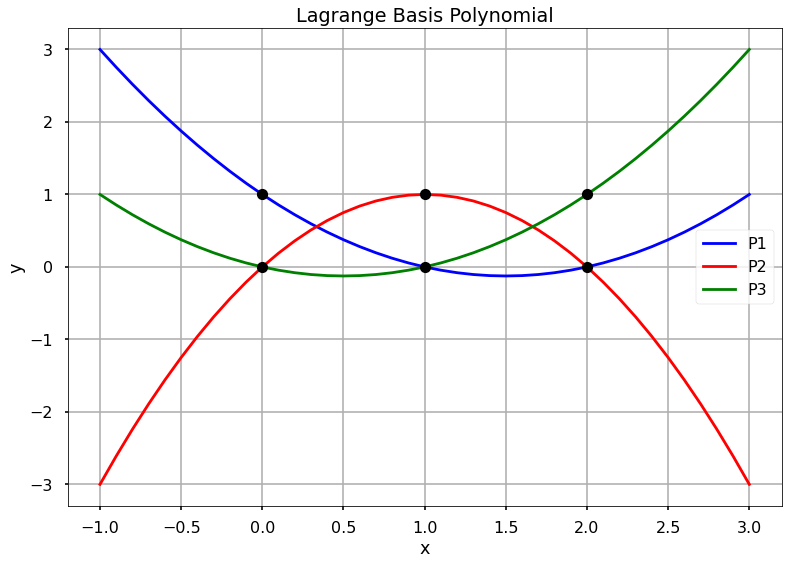

In [15]:
#Example from Textbook
import numpy as np
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')

x = [0,1,2]
y = [1,3,2]

P1_coeff = [1, -1.5, 0.5]
P2_coeff = [0, 2, -1]
P3_coeff = [0, -0.5, 0.5]

P1 = poly.Polynomial(P1_coeff)
P2 = poly.Polynomial(P2_coeff)
P3 = poly.Polynomial(P3_coeff)

x_new = np.arange(-1.0, 3.1, 0.1)

plt.plot(x_new, P1(x_new), 'b', label = 'P1')
plt.plot(x_new, P2(x_new), 'r', label = 'P2')
plt.plot(x_new, P3(x_new), 'g', label = 'P3')

plt.plot(x,np.ones(len(x)), 'ko', x, np.zeros(len(x)), 'ko')
plt.title('Lagrange Basis Polynomial')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.show()

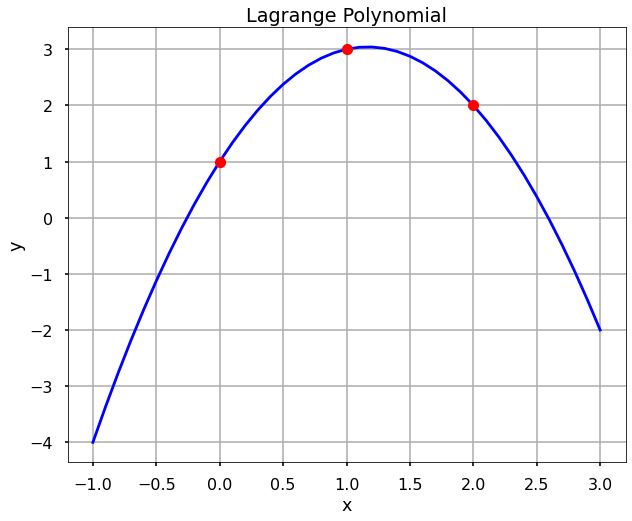

In [16]:
L = P1 + 3*P2 + 2*P3

fig = plt.figure(figsize = (10,8))
plt.plot(x_new, L(x_new), 'b', x, y, 'ro')
plt.title('Lagrange Polynomial')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

# 17.5: Newton's Polynomial Interpolation

* Newton's Polynomial Interpolation - Another method to exactly fit a set of data points.

General form of a a n-1 order Newton's Polynomial that goes through n points is:

f(x) = a0 + a1* (x-x_0) + a2* (x-x_0)(x-x_1) + ... + an (x-x_0)* (x-x_1)* ...* (x-x_n)

Divided Differences Equation:

f[x_k, x_k-1, ... , x_1, x_0] = ( f[x_k,x_k-1,...,x_2,x_1] - f[x_k-s1, x_k-2,...,x_1,x_0])/ (x_k - x_0)

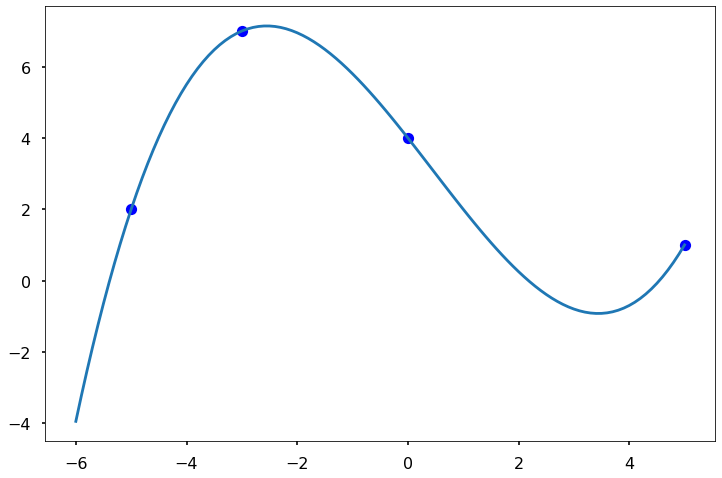

In [20]:
#Example using x=[-5,-3,0,5] and y=[2,7,4,1]

import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

%matplotlib inline
def divided_diff(x, y):

  n = len(y)
  coef = np.zeros([n, n])
  coef[:,0] = y

  for j in range (1,n):
    for i in range(n-j):
      coef[i][j] = \
      (coef [i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])

  return coef

def newton_poly(coef, x_data, x):

  n = len(x_data) - 1
  p = coef[n]
  for k in range (1, n+1):
    p = coef[n-k] + (x - x_data[n-k]) * p
  return p
  
xthree = np.array([-5, -3, 0, 5])
ythree = np.array([2, 7, 4, 1])

a_s = divided_diff(xthree, ythree) [0, :]

x_neww = np.arange(-6, 5.1, .1)
y_neww = newton_poly(a_s, xthree, x_neww)

plt.figure(figsize = (12,8))
plt.plot(xthree, ythree, 'bo')
plt.plot(x_neww, y_neww)